# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [3]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [38]:
DATA_FOLDER = 'task_1/'

# get the path to the data
mmlu_DATASET = os.path.join(DATA_FOLDER, "mmlu_data/test.csv")
lm_scoresX_DATASET = os.path.join(DATA_FOLDER, "lm_scores/lm_X.csv")
lm_scoresY_DATASET = os.path.join(DATA_FOLDER, "lm_scores/lm_Y.csv")
lm_scoresZ_DATASET = os.path.join(DATA_FOLDER, "lm_scores/lm_Z.csv")

# load the data
df_test = pd.read_csv(mmlu_DATASET)
df_x = pd.read_csv(lm_scoresX_DATASET)
df_y = pd.read_csv(lm_scoresY_DATASET)
df_z = pd.read_csv(lm_scoresZ_DATASET)

# print the data
df_test.head()


,question,A,B,C,D,answer,subject,question_id
0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,0
1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,1
2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,2
3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,3
4,Find the product of the given polynomials in t...,2x^2 + 5,6x^2 + 4x + 6,0,x^2 + 1,B,abstract algebra,4


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [39]:
# A
#df_x
print("Value counts for df_x:")
print(df_x['result'].value_counts(), "\n")
#print("index for : Random assignment, random selection, so the answer is B is ",df_x[df_x['result'] == "Random assignment, random selection, so the answer is B"].index)

# filter df_x to show rows where 'result' is not 'A', 'B', 'C', or 'D'
unexpected_results_df_x = df_x[~df_x['result'].isin(['A', 'B', 'C', 'D'])]
# print the unexpected results
print("Unexpected results in df_x:")
print(unexpected_results_df_x['result'])

# find index for a long sentence answer
#print("index for : Random assignment, random selection, so the answer is B is ",df_x[df_x['result'] == "Random assignment, random selection, so the answer is B"].index)

#df_y
print("Value counts for df_y:")
print(df_y['result'].value_counts(), "\n")
# filter df_y to show rows where 'result' is not 'A', 'B', 'C', or 'D'
unexpected_results_df_y = df_y[~df_y['result'].isin(['A', 'B', 'C', 'D'])]
# print the unexpected results
print("Unexpected results in df_y:")
print(unexpected_results_df_y['result'])

#df_z
print("Value counts for df_z:")
print(df_z['result'].value_counts(), "\n")
# filter df_y to show rows where 'result' is not 'A', 'B', 'C', or 'D'
unexpected_results_df_z = df_z[~df_z['result'].isin(['A', 'B', 'C', 'D'])]
# print the unexpected results
print("Unexpected results in df_z:")
print(unexpected_results_df_z['result'])

Value counts for df_x:
result
A                                                                                          2733
A                                                                                          1657
B                                                                                          1412
Answer: A                                                                                  1398
C                                                                                          1134
                                                                                           ... 
we tend to remember unfinished tasks better than finished ones., so the answer is A           1
only if the employee was referred to the program by the supervisor., so the answer is B       1
a simultaneous event produced the fluctuation, so the answer is A                             1
Random assignment, random selection, so the answer is B                                       1
to interpr

In [40]:
### #B
#After running ``value_counts()``, we can see that besides the expected answers (A, B, C, D), there are unexpected formats in the 'result' column:
#- Prefixed answers: Some results are in the format "Answer: B" instead of just "B"
#- Answers with extra spaces: Some results have extra spaces before or after the answer, e.g. " B" or "B "
#- Answers with long sentences as in df_x: "Random assignment, random selection, so the answer is B" (index 12801 in df_x)
#- Sometimes, there is no answer: NaN (index 3 in df_y)


### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [41]:
# A

# filtre for answers with less than 10 characters
df_x_filtered = df_x[df_x['result'].str.len() < 10].copy(deep=True)
df_y_filtered = df_y[df_y['result'].str.len() < 10].copy(deep=True)
df_z_filtered = df_z[df_z['result'].str.len() < 10].copy(deep=True)

# print the sizes of the original and filtered dataframes to see the difference after filtration
print("Original df_x size:", df_x.shape)
print("Filtered df_x size:", df_x_filtered.shape, "\n")

print("Original df_y size:", df_y.shape)
print("Filtered df_y size:", df_y_filtered.shape, "\n")

print("Original df_z size:", df_z.shape)
print("Filtered df_z size:", df_z_filtered.shape, "\n")


Original df_x size: (13882, 2)
Filtered df_x size: (13509, 2) 

Original df_y size: (13978, 2)
Filtered df_y size: (13637, 2) 

Original df_z size: (13923, 2)
Filtered df_z size: (12878, 2) 



In [42]:
# B
import re
# definition of the cleaning function
def clean_answer(s):
    s = str(s)
    match = re.search(r'\b[A-D]\b', s)
    
    # return the matched letter if found, else return an empty string or NaN
    return match.group(0) if match else ''

# apply the cleaning function to the 'result' column of the filtered dataframes
df_x_filtered['result'] = df_x_filtered['result'].apply(clean_answer)
df_y_filtered['result'] = df_y_filtered['result'].apply(clean_answer)
df_z_filtered['result'] = df_z_filtered['result'].apply(clean_answer)

# check if all remaining answers are A, B, C, or D
valid_answers = ['A', 'B', 'C', 'D']

df_x_filtered = df_x_filtered[df_x_filtered['result'].isin(valid_answers)]
df_y_filtered = df_y_filtered[df_y_filtered['result'].isin(valid_answers)]
df_z_filtered = df_z_filtered[df_z_filtered['result'].isin(valid_answers)]

print(df_x_filtered['result'].value_counts(), "\n")
print(df_y_filtered['result'].value_counts(), "\n")
print(df_z_filtered['result'].value_counts(), "\n")

# print the sizes after cleaning
print("Filtered and cleaned df_x size:", len(df_x_filtered))
print("Filtered and cleaned df_y size:", len(df_y_filtered))
print("Filtered and cleaned df_z size:", len(df_z_filtered))




result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64 

result
D    5757
C    3242
B    2519
A    2033
Name: count, dtype: int64 

result
D    3348
C    3255
B    3124
A    3026
Name: count, dtype: int64 

Filtered and cleaned df_x size: 13436
Filtered and cleaned df_y size: 13551
Filtered and cleaned df_z size: 12753


C. /Discuss:/

After filtering and cleaning, we can see the following changes in dataframe sizes:

- df_x: went from 13 882 to 13 436
- df_y: went from 13 978 to 13 551
- df_z: went from 13 923 to 12 753
  

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [43]:
# A
# do inner join between df_test and each filtered dataframe on 'question_id'
df_x_merged = pd.merge(df_x_filtered, df_test, on='question_id', how='inner')
df_y_merged = pd.merge(df_y_filtered, df_test, on='question_id', how='inner')
df_z_merged = pd.merge(df_z_filtered, df_test, on='question_id', how='inner')

In [58]:
# B
# add a 'correct' column that checks if the model's answer matches the expected answer
df_x_merged['correct'] = df_x_merged['result'] == df_x_merged['answer']
df_y_merged['correct'] = df_y_merged['result'] == df_y_merged['answer']
df_z_merged['correct'] = df_z_merged['result'] == df_z_merged['answer']

# calculate and print the average score for each model
print(f"Average score for df_x: {df_x_merged['correct'].mean():.2%}")
print(f"Average score for df_y: {df_y_merged['correct'].mean():.2%}")
print(f"Average score for df_z: {df_z_merged['correct'].mean():.2%}")


Average score for df_x: 76.75%
Average score for df_y: 74.58%
Average score for df_z: 66.33%


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [45]:
# A

# group by subject and count the questions answered
questions_per_subject_x = df_x_merged.groupby('subject').size()
questions_per_subject_y = df_y_merged.groupby('subject').size()
questions_per_subject_z = df_z_merged.groupby('subject').size()

# compare the number of questions answered by each model for each subject
subjects = questions_per_subject_x.index
unbalanced_subjects = []
for subject in subjects:
    x_count = questions_per_subject_x[subject]
    y_count = questions_per_subject_y.get(subject, 0) # 0 for missing subject
    z_count = questions_per_subject_z.get(subject, 0)

    # calculate percentage difference between models X and Y
    diff = abs(max(x_count, y_count, z_count) - min(x_count,y_count,z_count)) / min(x_count,y_count,z_count)
    if diff > 0.10:
        unbalanced_subjects.append(subject)
        print(f"Subject: {subject}, Difference: {diff:.2%}")

Subject: college chemistry, Difference: 16.67%
Subject: college computer science, Difference: 16.67%
Subject: computer security, Difference: 12.64%
Subject: formal logic, Difference: 12.84%
Subject: high school geography, Difference: 10.80%
Subject: logical fallacies, Difference: 13.24%
Subject: medical genetics, Difference: 10.11%
Subject: moral disputes, Difference: 31.60%
Subject: moral scenarios, Difference: 17.37%


In [70]:
# B. Rebalancing the dataset by downsampling the majority class for each unbalanced subject
from sklearn.utils import resample

# Initialize empty DataFrames to store balanced data
df_x_balanced = pd.DataFrame()
df_y_balanced = pd.DataFrame()
df_z_balanced = pd.DataFrame()

# Loop through each unbalanced subject and perform downsampling
for subject in unbalanced_subjects:
    # Get the data for the current subject for each model
    df_x_subject = df_x_merged[df_x_merged['subject'] == subject]
    df_y_subject = df_y_merged[df_y_merged['subject'] == subject]
    df_z_subject = df_z_merged[df_z_merged['subject'] == subject]
    
    # Get the minimum number of questions answered among the three models
    min_size = min(len(df_x_subject), len(df_y_subject), len(df_z_subject))
    
    # Downsample the majority class for each subject to match the minority class size
    df_x_downsampled = resample(df_x_subject, replace=False, n_samples=min_size, random_state=42)
    df_y_downsampled = resample(df_y_subject, replace=False, n_samples=min_size, random_state=42)
    df_z_downsampled = resample(df_z_subject, replace=False, n_samples=min_size, random_state=42)
    
    # Append the downsampled data to the balanced DataFrames
    df_x_balanced = pd.concat([df_x_balanced,df_x_downsampled])
    df_y_balanced= pd.concat([df_y_balanced,df_y_downsampled])
    df_z_balanced= pd.concat([df_z_balanced,df_z_downsampled])

print("new df_x size:", len(df_x_balanced))
print("new df_y size:", len(df_y_balanced))
print("new df_z size:", len(df_z_balanced))

# Remove the original unbalanced rows from df_x_merged, df_y_merged, df_z_merged
df_x_cleaned = df_x_merged[~df_x_merged['subject'].isin(unbalanced_subjects)].copy()
df_y_cleaned = df_y_merged[~df_y_merged['subject'].isin(unbalanced_subjects)].copy()
df_z_cleaned = df_z_merged[~df_z_merged['subject'].isin(unbalanced_subjects)].copy()
print("df_x_cleaned size:", len(df_x_cleaned))
print("df_y_cleaned size:", len(df_y_cleaned))
print("df_z_cleaned size:", len(df_z_cleaned))


# Append the balanced data for those subjects
df_x_final = pd.concat([df_x_cleaned, df_x_balanced])
df_y_final = pd.concat([df_y_cleaned, df_y_balanced])
df_z_final = pd.concat([df_z_cleaned, df_z_balanced])

# Print the sizes of the final DataFrames to confirm the changes
print("Final df_x size:", len(df_x_final))
print("Final df_y size:", len(df_y_final))
print("Final df_z size:", len(df_z_final))


new df_x size: 1752
new df_y size: 1752
new df_z size: 1752
df_x_cleaned size: 11527
df_y_cleaned size: 11538
df_z_cleaned size: 10949
Final df_x size: 13279
Final df_y size: 13290
Final df_z size: 12701


In [62]:
# C
# Print the accuracies with more context
print(f"Average score for df_x: {df_x_final['correct'].mean():.2%}")
print(f"Average score for df_y: {df_y_final['correct'].mean():.2%}")
print(f"Average score for df_z: {df_z_final['correct'].mean():.2%}")


Average score for df_x: 76.81%
Average score for df_y: 74.58%
Average score for df_z: 66.38%


Before vs After undersampling

size before | size after 
--------|--------
13436   | 13279
13551   | 13290
12753   | 12701

accuracy before | accuracy after
---------------|---------------
76.75%        | 76.81%
74.58%        | 74.58%
66.33%        | 66.38%


In [65]:
# check if it is really balanced

# group by subject and count the questions answered
questions_per_subject_x = df_x_balanced.groupby('subject').size()
questions_per_subject_y = df_y_balanced.groupby('subject').size()
questions_per_subject_z = df_z_balanced.groupby('subject').size()

# compare the number of questions answered by each model for each subject
subjects = questions_per_subject_x.index
for subject in unbalanced_subjects:
    x_count = questions_per_subject_x[subject]
    y_count = questions_per_subject_y.get(subject, 0) # 0 for missing subject
    z_count = questions_per_subject_z.get(subject, 0)

    # calculate percentage difference between models X and Y
    diff = abs(max(x_count, y_count, z_count) - min(x_count,y_count,z_count)) / min(x_count,y_count,z_count)
    print(f"Difference: {diff:.2%}")


Difference: 0.00%
Difference: 0.00%
Difference: 0.00%
Difference: 0.00%
Difference: 0.00%
Difference: 0.00%
Difference: 0.00%
Difference: 0.00%
Difference: 0.00%


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [4]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [8]:
# A
# For df_mmlu
mean_accuracy_mmlu_X = df_mmlu[(df_mmlu["model_name"] == 'X')]['correct'].mean()
standard_error_mmlu_X = df_mmlu[(df_mmlu["model_name"] == 'X')]['correct'].std() / np.sqrt(len(df_mmlu[df_mmlu["model_name"] == 'X']))

mean_accuracy_mmlu_Y = df_mmlu[(df_mmlu["model_name"] == 'Y')]['correct'].mean()
standard_error_mmlu_Y = df_mmlu[(df_mmlu["model_name"] == 'Y')]['correct'].std() / np.sqrt(len(df_mmlu[df_mmlu["model_name"] == 'Y']))

mean_accuracy_mmlu_Z = df_mmlu[(df_mmlu["model_name"] == 'Z')]['correct'].mean()
standard_error_mmlu_Z = df_mmlu[(df_mmlu["model_name"] == 'Z')]['correct'].std() / np.sqrt(len(df_mmlu[df_mmlu["model_name"] == 'Z']))

# For df_other
mean_accuracy_other_X = df_other[(df_other["model_name"] == 'X')]['correct'].mean()
standard_error_other_X = df_other[(df_other["model_name"] == 'X')]['correct'].std() / np.sqrt(len(df_other[df_other["model_name"] == 'X']))

mean_accuracy_other_Y = df_other[(df_other["model_name"] == 'Y')]['correct'].mean()
standard_error_other_Y = df_other[(df_other["model_name"] == 'Y')]['correct'].std() / np.sqrt(len(df_other[df_other["model_name"] == 'Y']))

mean_accuracy_other_Z = df_other[(df_other["model_name"] == 'Z')]['correct'].mean()
standard_error_other_Z = df_other[(df_other["model_name"] == 'Z')]['correct'].std() / np.sqrt(len(df_other[df_other["model_name"] == 'Z']))

print("Mean accuracy for model X df_mmlu: {:.4f}".format(mean_accuracy_mmlu_X))
print("Standard error for model X df_mmlu: {:.4f}".format(standard_error_mmlu_X))
print("Mean accuracy for model Y df_mmlu: {:.4f}".format(mean_accuracy_mmlu_Y))
print("Standard error for model Y df_mmlu: {:.4f}".format(standard_error_mmlu_Y))
print("Mean accuracy for model Z df_mmlu: {:.4f}".format(mean_accuracy_mmlu_Z))
print("Standard error for model Z df_mmlu: {:.4f}".format(standard_error_mmlu_Z))

print("Mean accuracy for model X df_other: {:.4f}".format(mean_accuracy_other_X))
print("Standard error for model X df_other: {:.4f}".format(standard_error_other_X))
print("Mean accuracy for model Y df_other: {:.4f}".format(mean_accuracy_other_Y))
print("Standard error for model Y df_other: {:.4f}".format(standard_error_other_Y))
print("Mean accuracy for model Z df_other: {:.4f}".format(mean_accuracy_other_Z))
print("Standard error for model Z df_other: {:.4f}".format(standard_error_other_Z))

Mean accuracy for model X df_mmlu: 0.7436
Standard error for model X df_mmlu: 0.0040
Mean accuracy for model Y df_mmlu: 0.7615
Standard error for model Y df_mmlu: 0.0039
Mean accuracy for model Z df_mmlu: 0.6560
Standard error for model Z df_mmlu: 0.0044
Mean accuracy for model X df_other: 0.7880
Standard error for model X df_other: 0.0067
Mean accuracy for model Y df_other: 0.7209
Standard error for model Y df_other: 0.0073
Mean accuracy for model Z df_other: 0.6717
Standard error for model Z df_other: 0.0077


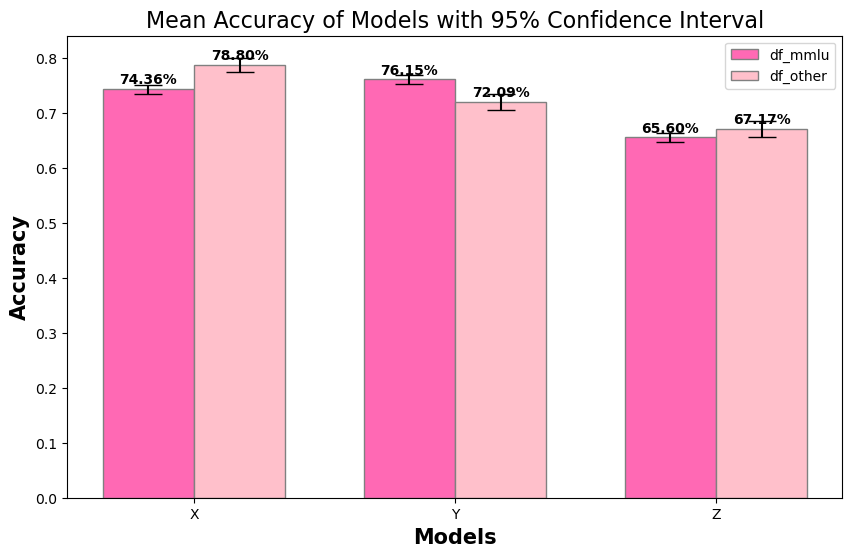

In [9]:
#B
# Mean accuracies and standard errors for each model
mean_accuracies_mmlu = [mean_accuracy_mmlu_X, mean_accuracy_mmlu_Y, mean_accuracy_mmlu_Z]
mean_accuracies_other = [mean_accuracy_other_X, mean_accuracy_other_Y, mean_accuracy_other_Z]

standard_errors_mmlu = [standard_error_mmlu_X, standard_error_mmlu_Y, standard_error_mmlu_Z]
standard_errors_other = [standard_error_other_X, standard_error_other_Y, standard_error_other_Z]

models = ['X', 'Y', 'Z'] 
barWidth = 0.35 

# Set positions of the bars on X-axis for mmlu and other
r1 = np.arange(len(models))  # positions for mmlu
r2 = [x + barWidth for x in r1]  # positions for other

plt.figure(figsize=(10, 6))

# Bars for df_mmlu
plt.bar(r1, mean_accuracies_mmlu, yerr=[1.96 * sem for sem in standard_errors_mmlu], color='hotpink', width=barWidth, edgecolor='grey', capsize=10, label='df_mmlu')

# Bars for df_other
plt.bar(r2, mean_accuracies_other, yerr=[1.96 * sem for sem in standard_errors_other], color='pink', width=barWidth, edgecolor='grey', capsize=10, label='df_other')

# Add labels and title
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Accuracy', fontweight='bold', fontsize=15)
plt.title('Mean Accuracy of Models with 95% Confidence Interval', fontsize=16)

# Custom X-axis labels
plt.xticks([r + barWidth / 2 for r in r1], models)

# Add value labels on top of the bars for df_mmlu
for i, v in enumerate(mean_accuracies_mmlu):
    plt.text(r1[i], v + 0.01, f'{v:.2%}', ha='center', fontweight='bold')

# Add value labels on top of the bars for df_other
for i, v in enumerate(mean_accuracies_other):
    plt.text(r2[i], v + 0.01, f'{v:.2%}', ha='center', fontweight='bold')

plt.legend()
plt.show()

C. /Discuss:/

- There is no better model than the other (see mean accuracy just slightly better)
- performance of each model is consistent (see standard errors)

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

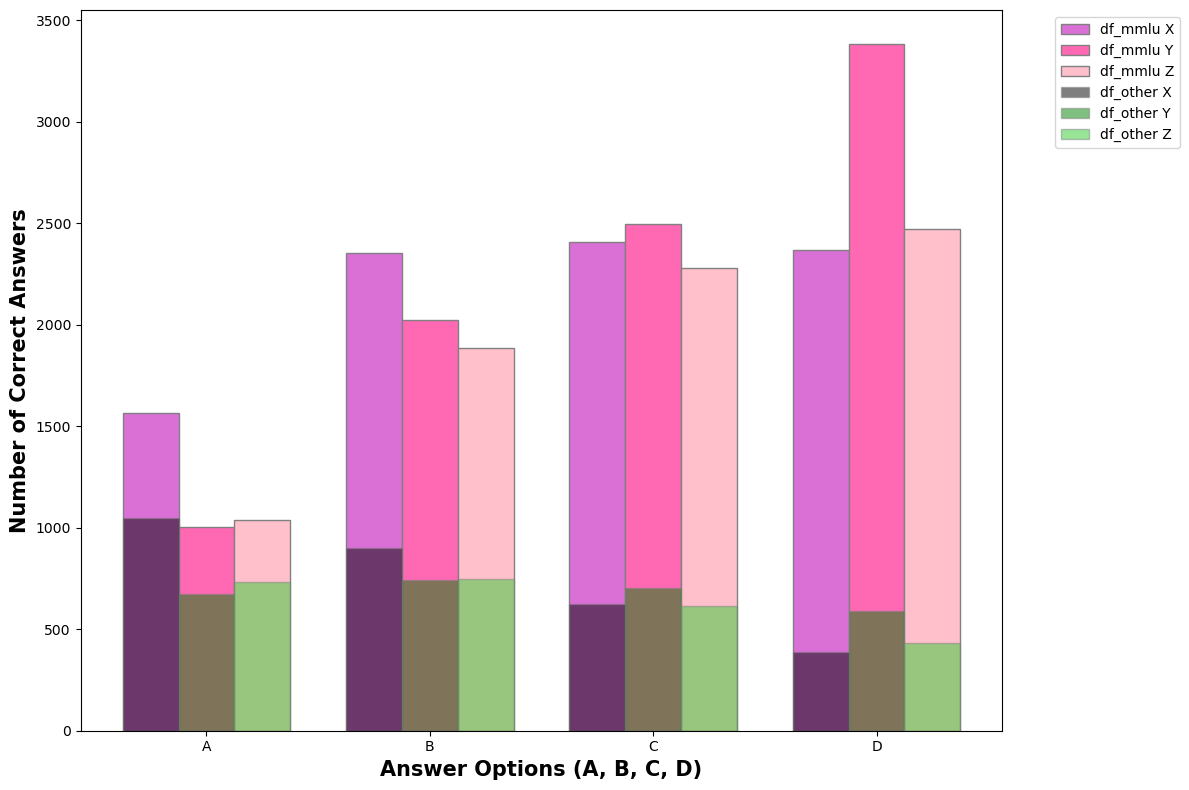

In [16]:
#A
# Filter the correct answers for each dataset
df_mmlu_correct = df_mmlu[df_mmlu['correct']]
df_other_correct = df_other[df_other['correct']]


fig, ax = plt.subplots(figsize=(12, 8))
barWidth = 0.25

# df_mmlu (group by model_name and answer)
answers_mmlu_X = [
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "X") & (df_mmlu_correct["answer"] == "A")].shape[0],
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "X") & (df_mmlu_correct["answer"] == "B")].shape[0],
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "X") & (df_mmlu_correct["answer"] == "C")].shape[0],
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "X") & (df_mmlu_correct["answer"] == "D")].shape[0]
]
answers_mmlu_Y = [
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "Y") & (df_mmlu_correct["answer"] == "A")].shape[0],
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "Y") & (df_mmlu_correct["answer"] == "B")].shape[0],
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "Y") & (df_mmlu_correct["answer"] == "C")].shape[0],
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "Y") & (df_mmlu_correct["answer"] == "D")].shape[0]
]
answers_mmlu_Z = [
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "Z") & (df_mmlu_correct["answer"] == "A")].shape[0],
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "Z") & (df_mmlu_correct["answer"] == "B")].shape[0],
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "Z") & (df_mmlu_correct["answer"] == "C")].shape[0],
    df_mmlu_correct[(df_mmlu_correct["model_name"] == "Z") & (df_mmlu_correct["answer"] == "D")].shape[0]
]

# df_other (group by model_name and answer)
answers_other_X = [
    df_other_correct[(df_other_correct["model_name"] == "X") & (df_other_correct["answer"] == "A")].shape[0],
    df_other_correct[(df_other_correct["model_name"] == "X") & (df_other_correct["answer"] == "B")].shape[0],
    df_other_correct[(df_other_correct["model_name"] == "X") & (df_other_correct["answer"] == "C")].shape[0],
    df_other_correct[(df_other_correct["model_name"] == "X") & (df_other_correct["answer"] == "D")].shape[0]
]
answers_other_Y = [
    df_other_correct[(df_other_correct["model_name"] == "Y") & (df_other_correct["answer"] == "A")].shape[0],
    df_other_correct[(df_other_correct["model_name"] == "Y") & (df_other_correct["answer"] == "B")].shape[0],
    df_other_correct[(df_other_correct["model_name"] == "Y") & (df_other_correct["answer"] == "C")].shape[0],
    df_other_correct[(df_other_correct["model_name"] == "Y") & (df_other_correct["answer"] == "D")].shape[0]
]
answers_other_Z = [
    df_other_correct[(df_other_correct["model_name"] == "Z") & (df_other_correct["answer"] == "A")].shape[0],
    df_other_correct[(df_other_correct["model_name"] == "Z") & (df_other_correct["answer"] == "B")].shape[0],
    df_other_correct[(df_other_correct["model_name"] == "Z") & (df_other_correct["answer"] == "C")].shape[0],
    df_other_correct[(df_other_correct["model_name"] == "Z") & (df_other_correct["answer"] == "D")].shape[0]
]

# Set positions of bars on the X-axis for X, Y, Z models
r1 = np.arange(4)  # Model X
r2 = [x + barWidth for x in r1]  # Model Y
r3 = [x + barWidth for x in r2]  # Model Z

# Plot for df_mmlu
plt.bar(r1, answers_mmlu_X, color='orchid', width=barWidth, edgecolor='grey', label='df_mmlu X')
plt.bar(r2, answers_mmlu_Y, color='hotpink', width=barWidth, edgecolor='grey', label='df_mmlu Y')
plt.bar(r3, answers_mmlu_Z, color='pink', width=barWidth, edgecolor='grey', label='df_mmlu Z')

# Plot for df_other
plt.bar(r1, answers_other_X, color='black', width=barWidth, edgecolor='grey', label='df_other X', alpha=0.5)
plt.bar(r2, answers_other_Y, color='green', width=barWidth, edgecolor='grey', label='df_other Y', alpha=0.5)
plt.bar(r3, answers_other_Z, color='limegreen', width=barWidth, edgecolor='grey', label='df_other Z', alpha=0.5)

plt.xlabel('Answer Options (A, B, C, D)', fontweight='bold', fontsize=15)
plt.ylabel('Number of Correct Answers', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(4)], ['A', 'B', 'C', 'D'])

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
# Check for duplicates in df_mmlu based on 'question_id'
duplicates_mmlu = df_mmlu[df_mmlu.duplicated(subset='question_id', keep=False)]

# Check for duplicates in df_other based on 'question_id'
duplicates_other = df_other[df_other.duplicated(subset='question_id', keep=False)]

print(f"Number of duplicated questions in df_mmlu: {duplicates_mmlu['question_id'].nunique()}")
print(f"Number of duplicated questions in df_other: {duplicates_other['question_id'].nunique()}")

# Check if all duplicated questions in df_mmlu have the same answer
duplicated_mmlu_consistency = duplicates_mmlu.groupby('question_id')['answer'].nunique()  # Get unique answer counts
inconsistent_mmlu = duplicated_mmlu_consistency[duplicated_mmlu_consistency > 1]  # Filter to find questions with more than one unique answer

# Check if all duplicated questions in df_other have the same answer
duplicated_other_consistency = duplicates_other.groupby('question_id')['answer'].nunique()  # Get unique answer counts
inconsistent_other = duplicated_other_consistency[duplicated_other_consistency > 1]  # Filter to find questions with more than one unique answer

# Display results
if inconsistent_mmlu.empty:
    print("All duplicated questions in df_mmlu have the same answer.")
else:
    print(f"Duplicated questions in df_mmlu with inconsistent answers: {inconsistent_mmlu.index.tolist()}")

if inconsistent_other.empty:
    print("All duplicated questions in df_other have the same answer.")
else:
    print(f"Duplicated questions in df_other with inconsistent answers: {inconsistent_other.index.tolist()}")


Number of duplicated questions in df_mmlu: 11696
Number of duplicated questions in df_other: 3759
All duplicated questions in df_mmlu have the same answer.
All duplicated questions in df_other have the same answer.


11696


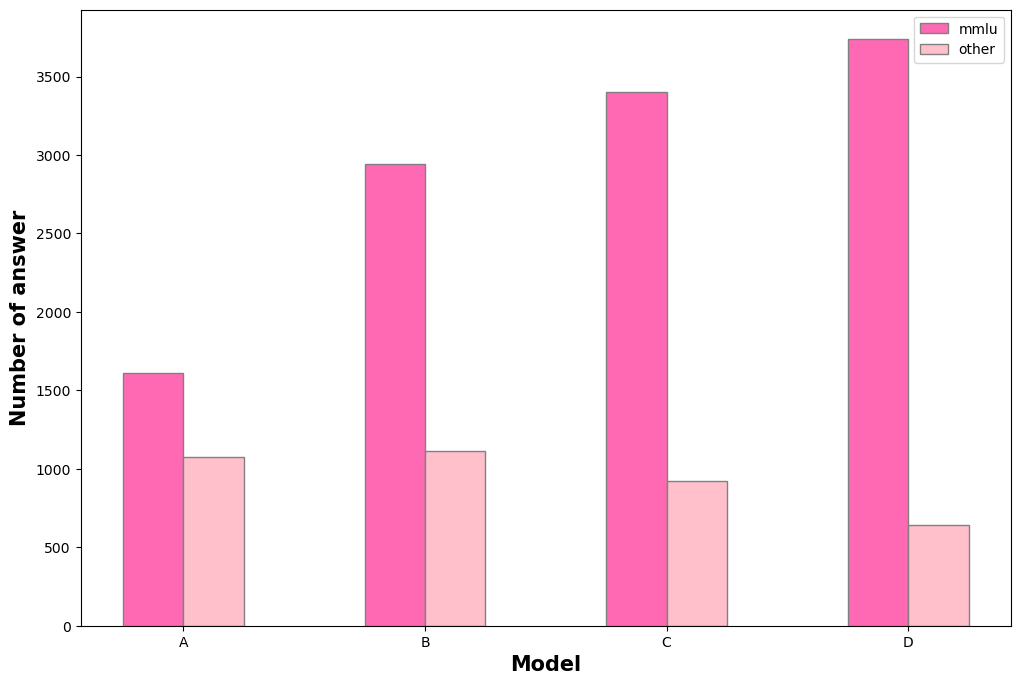

In [5]:
# A
#drop duplicated questions
df_mmlu_unique = df_mmlu.drop_duplicates(subset='question_id')
df_other_unique = df_other.drop_duplicates(subset='question_id')
print(df_mmlu_unique.shape[0])
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 

# set height of bar 
answers_mmlu = [df_mmlu_unique[df_mmlu_unique["answer"]=="A"].shape[0], 
                df_mmlu_unique[df_mmlu_unique["answer"]=="B"].shape[0], 
                df_mmlu_unique[df_mmlu_unique["answer"]=="C"].shape[0], 
                df_mmlu_unique[df_mmlu_unique["answer"]=="D"].shape[0]] 
answers_other = [df_other_unique[df_other_unique["answer"]=="A"].shape[0], 
                 df_other_unique[df_other_unique["answer"]=="B"].shape[0], 
                 df_other_unique[df_other_unique["answer"]=="C"].shape[0], 
                 df_other_unique[df_other_unique["answer"]=="D"].shape[0]] 

# Set position of bar on X axis 
br1 = np.arange(len(answers_mmlu) )
br2 = [x + barWidth for x in br1] 

# Make the plot
plt.bar(br1, answers_mmlu, color ='hotpink', width = barWidth, 
        edgecolor ='grey', label ='mmlu') 
plt.bar(br2, answers_other, color ='pink', width = barWidth, 
        edgecolor ='grey', label ='other') 

# Adding Xticks 
plt.xlabel('Model', fontweight ='bold', fontsize = 15) 
plt.ylabel('Number of answer', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth/2 for r in range(len(answers_mmlu))], 
        ['A', 'B', 'C', 'D'])

plt.legend()
plt.show() 



In [12]:
# B
from scipy.stats import chi2_contingency

# 2D array with the counts of correct answers for both mmlu and other models
contingency_table = np.array([answers_mmlu, answers_other])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies: \n", expected)

# Test evaluation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the distribution of correct answers between the two datasets.")


Chi-square statistic: 629.3958675644751
P-value: 4.270849602795191e-136
Degrees of freedom: 3
Expected frequencies: 
 [[2034.97534778 3071.76085409 3274.5772889  3314.68650922]
 [ 654.02465222  987.23914591 1052.4227111  1065.31349078]]
Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets.


### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [22]:
# A
def compute_mean_accuracy_for_model (df, correct_answer, model_name):
    """
    Compute the mean accuracy for a given correct answer and model.
    """
    correct_rows = df[df['answer'] == correct_answer]
    correct_rows = df[(df['answer'] == correct_answer) & (df['model_name'] == model_name)]

    return (correct_rows['result'] == correct_rows['answer']).mean()

mean_accuracy_mmlu_A = compute_mean_accuracy_for_model(df_mmlu, 'A', 'X')
mean_accuracy_mmlu_B = compute_mean_accuracy_for_model(df_mmlu, 'B', 'X')
mean_accuracy_mmlu_C = compute_mean_accuracy_for_model(df_mmlu, 'C', 'X')
mean_accuracy_mmlu_D = compute_mean_accuracy_for_model(df_mmlu, 'D', 'X')

mean_accuracy_other_A = compute_mean_accuracy_for_model(df_other, 'A', 'X')
mean_accuracy_other_B = compute_mean_accuracy_for_model(df_other, 'B', 'X')
mean_accuracy_other_C = compute_mean_accuracy_for_model(df_other, 'C', 'X')
mean_accuracy_other_D = compute_mean_accuracy_for_model(df_other, 'D', 'X')

print("Mean accuracy for df_mmlu (Model X) when the correct answer is 'A': {:.4f}".format(mean_accuracy_mmlu_A))
print("Mean accuracy for df_mmlu (Model X) when the correct answer is 'B': {:.4f}".format(mean_accuracy_mmlu_B))
print("Mean accuracy for df_mmlu (Model X) when the correct answer is 'C': {:.4f}".format(mean_accuracy_mmlu_C))
print("Mean accuracy for df_mmlu (Model X) when the correct answer is 'D': {:.4f}".format(mean_accuracy_mmlu_D))

print("Mean accuracy for df_other (Model X) when the correct answer is 'A': {:.4f}".format(mean_accuracy_other_A))
print("Mean accuracy for df_other (Model X) when the correct answer is 'B': {:.4f}".format(mean_accuracy_other_B))
print("Mean accuracy for df_other (Model X) when the correct answer is 'C': {:.4f}".format(mean_accuracy_other_C))
print("Mean accuracy for df_other (Model X) when the correct answer is 'D': {:.4f}".format(mean_accuracy_other_D))

Mean accuracy for df_mmlu (Model X) when the correct answer is 'A': 0.9727
Mean accuracy for df_mmlu (Model X) when the correct answer is 'B': 0.7992
Mean accuracy for df_mmlu (Model X) when the correct answer is 'C': 0.7079
Mean accuracy for df_mmlu (Model X) when the correct answer is 'D': 0.6336
Mean accuracy for df_other (Model X) when the correct answer is 'A': 0.9740
Mean accuracy for df_other (Model X) when the correct answer is 'B': 0.8065
Mean accuracy for df_other (Model X) when the correct answer is 'C': 0.6764
Mean accuracy for df_other (Model X) when the correct answer is 'D': 0.6037


In [19]:
# B

from scipy.stats import ttest_ind

# Get rows where the correct answer is "A" in both datasets
df_mmlu_A = df_mmlu[(df_mmlu['answer'] == 'A') & (df_mmlu['model_name'] == 'X')]
df_other_A = df_other[(df_other['answer'] == 'A') & (df_other['model_name'] == 'X')]

# Calculate accuracy for each dataset where answer is A (for Model X)
accuracy_mmlu_A = (df_mmlu_A['result'] == df_mmlu_A['answer']).astype(int)
accuracy_other_A = (df_other_A['result'] == df_other_A['answer']).astype(int)

#  T-test to compare accuracy for answer A between both datasets (for Model X)
t_stat, p_value = ttest_ind(accuracy_mmlu_A, accuracy_other_A)

print("T-statistic: {:.4f}".format(t_stat))
print("P-value: {:.4f}".format(p_value))

# Confidence Interval evaluation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in performance for answer 'A' between the two datasets for model X.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in performance for answer 'A' between the two datasets for model X.")


T-statistic: -0.2106
P-value: 0.8332
Fail to reject the null hypothesis: There is no significant difference in performance for answer 'A' between the two datasets for model X.


In [21]:
# C

# Function compares performance for A vs (C or D)
def compare_A_vs_CD(df, model_name):
    # Filter rows for answer A and (C or D)
    df_A = df[(df['answer'] == 'A') & (df['model_name'] == model_name)]
    df_CD = df[(df['answer'].isin(['C', 'D'])) & (df['model_name'] == model_name)]
    
    # Calculate accuracy
    accuracy_A = (df_A['result'] == df_A['answer']).astype(int)
    accuracy_CD = (df_CD['result'] == df_CD['answer']).astype(int)
    
    # T-test to compare accuracy between A and (C or D)
    t_stat, p_value = ttest_ind(accuracy_A, accuracy_CD)
    
    return t_stat, p_value

# For both datasets
t_stat_mmlu, p_value_mmlu = compare_A_vs_CD(df_mmlu, 'X')
t_stat_other, p_value_other = compare_A_vs_CD(df_other, 'X')

# Print the results
print("df_mmlu - T-statistic: {:.4f}, P-value: {:.4f}".format(t_stat_mmlu, p_value_mmlu))
if p_value_mmlu < alpha:
    print("Reject the null hypothesis: There is a significant difference in performance between 'A' and 'C or D' in df_mmlu.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in performance between 'A' and 'C or D' in df_mmlu.")

# Print results for df_other using .format()
print("df_other - T-statistic: {:.4f}, P-value: {:.4f}".format(t_stat_other, p_value_other))
if p_value_other < alpha:
    print("Reject the null hypothesis: There is a significant difference in performance between 'A' and 'C or D' in df_other.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in performance between 'A' and 'C or D' in df_other.")


df_mmlu - T-statistic: 25.5564, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in performance between 'A' and 'C or D' in df_mmlu.
df_other - T-statistic: 21.6670, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in performance between 'A' and 'C or D' in df_other.


### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [23]:
# A
def compute_mean_accuracy_all_models (df, correct_answer):
    """
    Compute the mean accuracy for a given correct answer.
    """
    correct_rows = df[df['answer'] == correct_answer]
    correct_rows = df[df['answer'] == correct_answer]

    return (correct_rows['result'] == correct_rows['answer']).mean()

mean_accuracy_mmlu_A = compute_mean_accuracy_all_models(df_mmlu, 'A')
mean_accuracy_mmlu_B = compute_mean_accuracy_all_models(df_mmlu, 'B')
mean_accuracy_mmlu_C = compute_mean_accuracy_all_models(df_mmlu, 'C')
mean_accuracy_mmlu_D = compute_mean_accuracy_all_models(df_mmlu, 'D')

mean_accuracy_other_A = compute_mean_accuracy_all_models(df_other, 'A')
mean_accuracy_other_B = compute_mean_accuracy_all_models(df_other, 'B')
mean_accuracy_other_C = compute_mean_accuracy_all_models(df_other, 'C')
mean_accuracy_other_D = compute_mean_accuracy_all_models(df_other, 'D')

print("Mean accuracy for df_mmlu (all models) when the correct answer is 'A': {:.4f}".format(mean_accuracy_mmlu_A))
print("Mean accuracy for df_mmlu (all models) when the correct answer is 'B': {:.4f}".format(mean_accuracy_mmlu_B))
print("Mean accuracy for df_mmlu (all models) when the correct answer is 'C': {:.4f}".format(mean_accuracy_mmlu_C))
print("Mean accuracy for df_mmlu (all models) when the correct answer is 'D': {:.4f}".format(mean_accuracy_mmlu_D))

print("Mean accuracy for df_other (all models) when the correct answer is 'A': {:.4f}".format(mean_accuracy_other_A))
print("Mean accuracy for df_other (all models) when the correct answer is 'B': {:.4f}".format(mean_accuracy_other_B))
print("Mean accuracy for df_other (all models) when the correct answer is 'C': {:.4f}".format(mean_accuracy_other_C))
print("Mean accuracy for df_other (all models) when the correct answer is 'D': {:.4f}".format(mean_accuracy_other_D))

Mean accuracy for df_mmlu (all models) when the correct answer is 'A': 0.7465
Mean accuracy for df_mmlu (all models) when the correct answer is 'B': 0.7095
Mean accuracy for df_mmlu (all models) when the correct answer is 'C': 0.7035
Mean accuracy for df_mmlu (all models) when the correct answer is 'D': 0.7330
Mean accuracy for df_other (all models) when the correct answer is 'A': 0.7600
Mean accuracy for df_other (all models) when the correct answer is 'B': 0.7127
Mean accuracy for df_other (all models) when the correct answer is 'C': 0.7006
Mean accuracy for df_other (all models) when the correct answer is 'D': 0.7337


B. /Discuss:/

- "A" answers are easier: 
  - Across all models (more specifically Model X), the highest performance is observed when the correct answer is "A". This could indicate that "A" is an easier answer option for the models to identify across both datasets.
- Drop in accuracy for "C" and "D" answers: 
  - Both datasets present this. Especially Model X that struggles more with these answers. This could indicate that some types of questions or answer patterns associated with "C" and "D" are harder for the models to process.
- Dataset consistency: 
  - The overall similar performance across datasets suggests that both datasets have comparable difficulty levels, as Ms. Sakota noted.



### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

/Discuss:/

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [ ]:
# A

B. /Discuss:/

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [ ]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [ ]:
# A

In [ ]:
# B

In [ ]:
# C

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [ ]:
# A

B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [ ]:
# A

B. /Dicsuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

/Discuss:/
1. 

2. 

3. 

4. 